In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from os import getenv
import sys

load_dotenv()
PROJECT_DIR = getenv("PROJECT_DIR")

sys.path.append(f"{PROJECT_DIR}/eda-and-visualization/EV-vechicle/scripts/")
import preprocessig as pr
import visualizing as vis


df = pd.read_csv(f"{PROJECT_DIR}/eda-and-visualization/EV-vechicle/data/ev_population.csv")

In [2]:
df.sample(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
186163,7SAYGDEF1N,King,Redmond,WA,98053.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,45.0,218502140,POINT (-122.030684 47.669552),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
60900,5YJYGDEE2L,King,Seattle,WA,98109.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,36.0,199487599,POINT (-122.3441532 47.6305366),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         205439 non-null  object 
 1   County                                             205436 non-null  object 
 2   City                                               205436 non-null  object 
 3   State                                              205439 non-null  object 
 4   Postal Code                                        205436 non-null  float64
 5   Model Year                                         205439 non-null  int64  
 6   Make                                               205439 non-null  object 
 7   Model                                              205438 non-null  object 
 8   Electric Vehicle Type                              205439 non-null  object

In [4]:
name = df.select_dtypes("object").columns[:4]

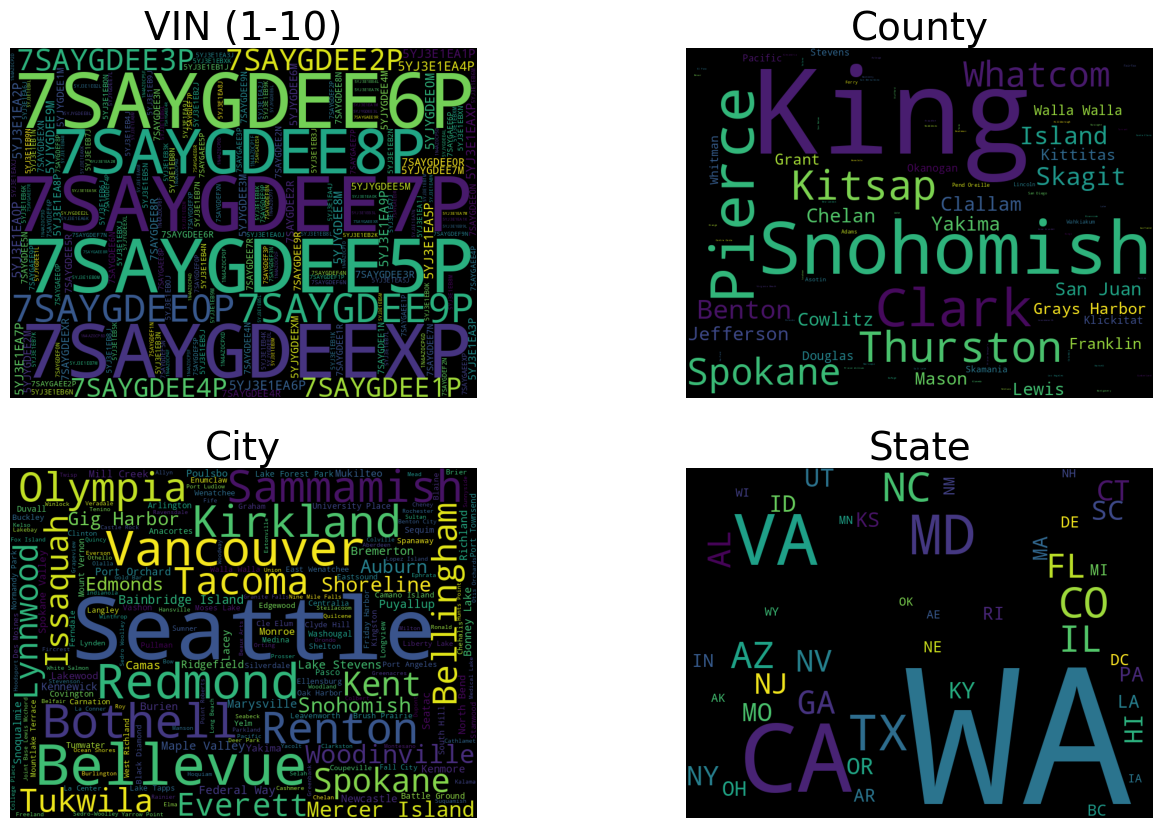

In [5]:
plt.figure(figsize=(16,10))
for index, each in enumerate(name, start=1):
    plt.subplot(2,2, index)
    vis.plot_wordcloud(df[each])
plt.show() 

In [6]:
df.select_dtypes(np.number)

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
0,98380.0,2023,42.0,0.0,35.0,240684006,5.303509e+10
1,98312.0,2018,151.0,0.0,35.0,474183811,5.303508e+10
2,98101.0,2020,266.0,0.0,43.0,113120017,5.303301e+10
3,98125.0,2014,84.0,0.0,46.0,108188713,5.303300e+10
4,98597.0,2017,238.0,0.0,20.0,176448940,5.306701e+10
...,...,...,...,...,...,...,...
205434,98847.0,2022,0.0,0.0,12.0,187384494,5.300796e+10
205435,98208.0,2023,0.0,0.0,44.0,255036386,5.306104e+10
205436,99004.0,2017,200.0,0.0,6.0,221631588,5.306301e+10
205437,98070.0,2018,215.0,0.0,34.0,336983496,5.303303e+10


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb4b0563d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb4b039c050>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb4b0563c50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb4b039c2d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb4b039c410>],
 'means': []}

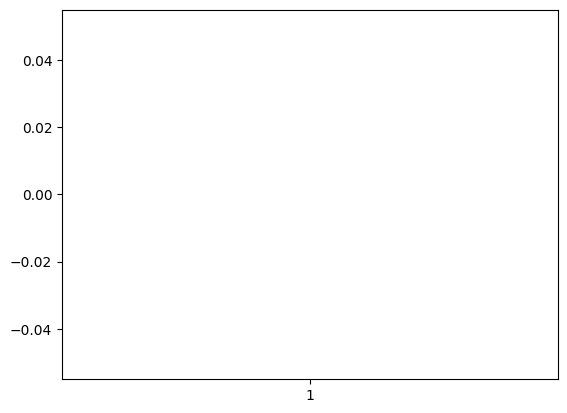

In [7]:
plt.boxplot(df['Electric Range'])

In [8]:
plt.box(df['Electric Range'])

Error in callback <function _draw_all_if_interactive at 0x7fb4b0f065c0> (for post_execute), with arguments args (),kwargs {}:


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 640x480 with 1 Axes>

In [9]:
import seaborn as sns

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'TESLA'),
  Text(1, 0, 'CHEVROLET'),
  Text(2, 0, 'NISSAN'),
  Text(3, 0, 'FORD'),
  Text(4, 0, 'KIA'),
  Text(5, 0, 'BMW'),
  Text(6, 0, 'TOYOTA'),
  Text(7, 0, 'HYUNDAI'),
  Text(8, 0, 'RIVIAN'),
  Text(9, 0, 'VOLKSWAGEN')])

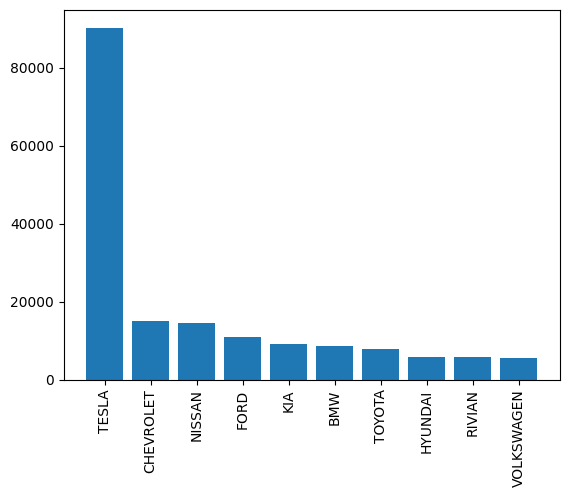

In [10]:
ad = df['Make'].value_counts().nlargest(n=10)
plt.bar(x=ad.index, height=ad.values)
plt.xticks(rotation=90)

In [11]:
df['Make'].value_counts(normalize=True)

Make
TESLA                   0.439634
CHEVROLET               0.073569
NISSAN                  0.070702
FORD                    0.052765
KIA                     0.044315
BMW                     0.041282
TOYOTA                  0.038673
HYUNDAI                 0.028145
RIVIAN                  0.027643
VOLKSWAGEN              0.027444
JEEP                    0.026348
VOLVO                   0.023739
AUDI                    0.019071
CHRYSLER                0.017976
MERCEDES-BENZ           0.009395
SUBARU                  0.006026
PORSCHE                 0.005997
POLESTAR                0.005656
HONDA                   0.005247
MITSUBISHI              0.004955
MINI                    0.004941
FIAT                    0.003889
LEXUS                   0.003670
CADILLAC                0.003626
MAZDA                   0.003461
DODGE                   0.003237
LINCOLN                 0.001455
LUCID                   0.001407
GENESIS                 0.001295
SMART                   0.001207
JAGUA

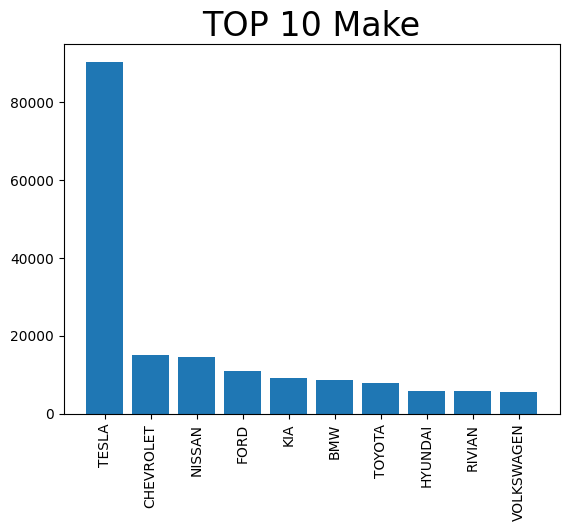

In [12]:
vis.plot_catagorical(df['Make'])

In [13]:
num_cols = df.select_dtypes(np.number).columns[1:-2]
num_cols

Index(['Model Year', 'Electric Range', 'Base MSRP', 'Legislative District'], dtype='object')

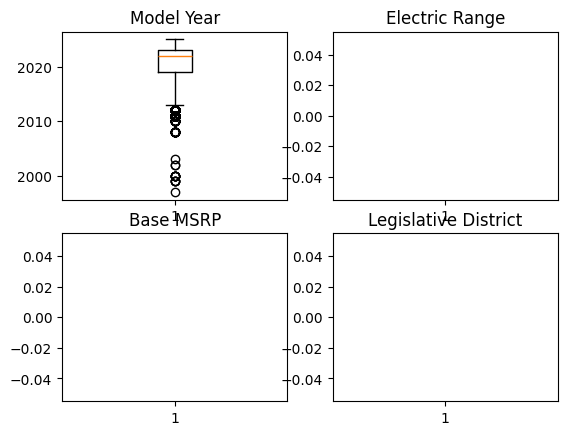

In [14]:
for index, each in enumerate(num_cols, start=1):
    plt.subplot(2,2, index)
    plt.title(each)
    plt.boxplot(df[each])

<Axes: xlabel='Electric Range', ylabel='Count'>

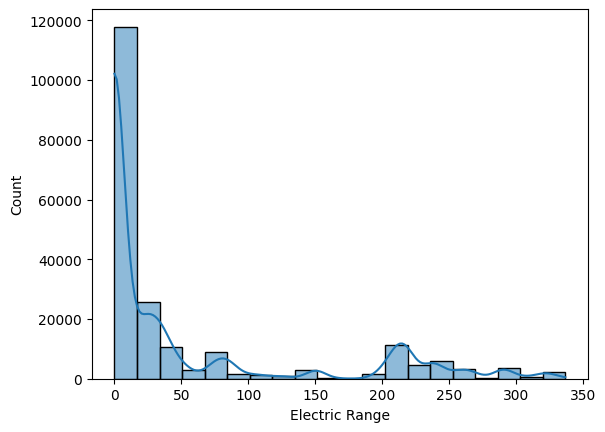

In [15]:
sns.histplot(df['Electric Range'], bins=20, kde=True)

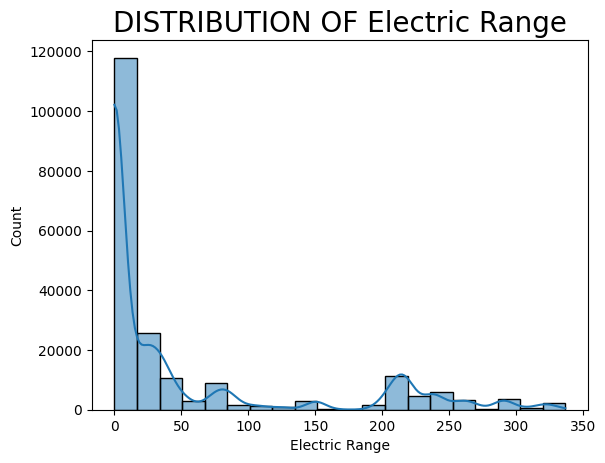

In [16]:
vis.plot_numerical(df['Electric Range'])